In [40]:
import numpy as np
import utility.load01deg as load
import matplotlib.pyplot as plt

In [80]:
region="TWP"
models=["CCCM","NICAM","FV3","ICON","SAM"]
fwp = []
alb = []
olr = []
for i,m in enumerate(models):
    if i==0:
        ds = load.get_cccm(region)
        fwp.append(ds["iwp MODIS"].values)
        albedo = ds["Outgoing SW radiation at TOA"].values/ds["Incoming SW radiation at TOA"].values
        alb.append(albedo)
        olr.append(ds["Outgoing LW radiation at TOA"].values)
    else:
        fwp.append(load.get_iwp(m, region, ice_only=False).values)
        alb.append((load.get_swu(m,region)/load.get_swd(m,region)).values)
        olr.append(load.get_olr(m,region).values)
olr[1] = olr[1][:,0,:,:]


Returned fwp for NICAM (TWP) with shape: (3936, 1, 100, 100)
Returned SWU for NICAM (TWP) with shape: (3744, 100, 100)
Returned SWD for NICAM (TWP) with shape: (3744, 100, 100)
Returned olr for NICAM (TWP) with shape: (3744, 1, 100, 100)
Returned fwp for FV3 (TWP) with shape: (3840, 100, 100)
Returned SWU for FV3 (TWP) with shape: (3648, 100, 100)
Returned SWD for FV3 (TWP) with shape: (3648, 100, 100)
Returned olr for FV3 (TWP) with shape: (3648, 100, 100)
Returned fwp for ICON (TWP) with shape: (3838, 100, 100)
Returned SWU for ICON (TWP) with shape: (3745, 100, 100)
Returned SWD for ICON (TWP) with shape: (3745, 100, 100)
Returned olr for ICON (TWP) with shape: (3745, 100, 100)
Returned fwp for SAM (TWP) with shape: (1920, 100, 100)
Returned SWU for SAM (TWP) with shape: (1824, 100, 100)
    used FV3 SWD...
Returned SWD for SAM (TWP) with shape: (1824, 100, 100)
Returned olr for SAM (TWP) with shape: (1824, 100, 100)


In [81]:
len(fwp), len(alb), len(olr), fwp[1].shape, alb[1].shape, olr[1].shape

(5, 5, 5, (3744, 100, 100), (3744, 100, 100), (3744, 100, 100))

In [82]:
time_len = [i.shape[0] for i in fwp]
print(time_len)

[58273, 3744, 3648, 3646, 1824]


In [83]:
# coarsen the model output by averaging over 0.3 deg x 0.3 deg areas
# Each model has an array that contains fwp, olr and alb as the first index
fwp_coarsen = [np.array([fwp[0], olr[0], alb[0]])] # obs are already coarsened
narray = np.zeros((3,time_len[1],33,33))
farray = np.zeros((3,time_len[2],33,33))
iarray = np.zeros((3,time_len[3],33,33))
sarray = np.zeros((3,time_len[4],33,33))

for j in range(33):
    for k in range(33):
        narray[0,:,j,k] = np.nanmean((fwp[1][:,j*3:(j+1)*3,k*3:(k+1)*3]))
        farray[0,:,j,k] = np.nanmean(fwp[2][:,j*3:(j+1)*3,k*3:(k+1)*3])
        iarray[0,:,j,k] = np.nanmean(fwp[3][:,j*3:(j+1)*3,k*3:(k+1)*3])
        sarray[0,:,j,k] = np.nanmean(fwp[4][:,j*3:(j+1)*3,k*3:(k+1)*3])
        narray[1,:,j,k] = np.nanmean((olr[1][:,j*3:(j+1)*3,k*3:(k+1)*3]))
        farray[1,:,j,k] = np.nanmean(olr[2][:,j*3:(j+1)*3,k*3:(k+1)*3])
        iarray[1,:,j,k] = np.nanmean(olr[3][:,j*3:(j+1)*3,k*3:(k+1)*3])
        sarray[1,:,j,k] = np.nanmean(olr[4][:,j*3:(j+1)*3,k*3:(k+1)*3])
        narray[2,:,j,k] = np.nanmean((alb[1][:,j*3:(j+1)*3,k*3:(k+1)*3]))
        farray[2,:,j,k] = np.nanmean(alb[2][:,j*3:(j+1)*3,k*3:(k+1)*3])
        iarray[2,:,j,k] = np.nanmean(alb[3][:,j*3:(j+1)*3,k*3:(k+1)*3])
        sarray[2,:,j,k] = np.nanmean(alb[4][:,j*3:(j+1)*3,k*3:(k+1)*3])
    
    print(j)
for i in [narray, farray, iarray, sarray]:
    fwp_coarsen.append(i)
print(fwp_coarsen[0].shape, fwp_coarsen[1].shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
(3, 58273) (3, 3744, 33, 33)


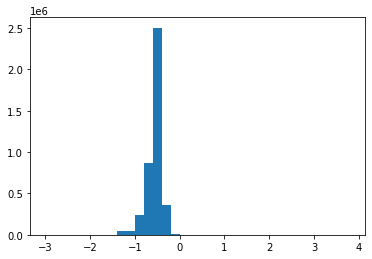

In [93]:
plt.hist(np.log10(narray[0].flatten()), bins=np.arange(-3,4,0.2))
plt.show()

In [85]:
olr1, olr2, olr3 = [],[],[]
alb1, alb2, alb3 = [],[],[]
for i,m in enumerate(models):
    if i==0:
        cat1=1000
        cat2=10
        cat3=0.1
    else:
        cat1=1
        cat2=1e-2
        cat3=1e-4
    olr1.append(np.where(fwp_coarsen[i][0]>=cat1, fwp_coarsen[i][1], np.nan))
    alb1.append(np.where(fwp_coarsen[i][0]>=cat1, fwp_coarsen[i][2], np.nan))
    olr2.append(np.where((fwp_coarsen[i][0]>=cat2)&(fwp_coarsen[i][0]<cat1), fwp_coarsen[i][1], np.nan))
    alb2.append(np.where((fwp_coarsen[i][0]>=cat2)&(fwp_coarsen[i][0]<cat1), fwp_coarsen[i][2], np.nan))
    olr3.append(np.where((fwp_coarsen[i][0]>=cat3)&(fwp_coarsen[i][0]<cat2), fwp_coarsen[i][1], np.nan))
    alb3.append(np.where((fwp_coarsen[i][0]>=cat3)&(fwp_coarsen[i][0]<cat2), fwp_coarsen[i][2], np.nan))

    
    

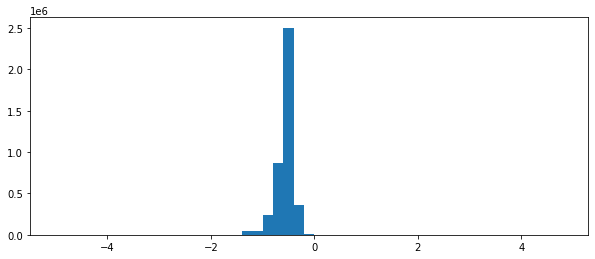

In [86]:
plt.figure(figsize=(10,4))
plt.hist(np.log10(fwp_coarsen[1][0].flatten()), bins=np.arange(-5,5,0.2))
plt.show()

In [87]:
(np.where(fwp_coarsen[i][0]>=cat1, fwp_coarsen[i][1], np.nan)).shape

(1824, 33, 33)

In [88]:
np.nansum((fwp_coarsen[1][0]>=1e-4)&(fwp_coarsen[1][0]<1e-2))

0

In [89]:
np.nanmax(fwp_coarsen[1][0])

0.6955848932266235

Returned fwp for NICAM (TWP) with shape: (3936, 1, 100, 100)


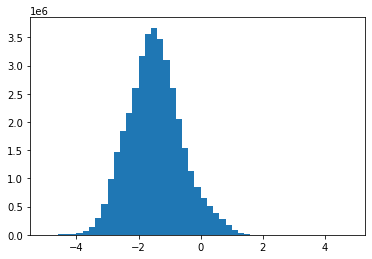

In [90]:
plt.hist(np.log10(load.get_iwp("NICAM", region, ice_only=False).values.flatten()), bins=np.arange(-5,5,0.2))
plt.show()